<a href="https://colab.research.google.com/github/Kushvith/tenserflow/blob/main/03_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to the computer vision and convolutional neural network using tensorflow 

In [25]:
import zipfile

# get data and download
# already downloaded if not uncomment it and run
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-04-07 16:29:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  22.2MB/s    in 5.9s    

2023-04-07 16:29:29 (17.8 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## we will walk through the pizza streak directory an filename.
this is the crucial step in the machine learning to visualize the data

In [26]:
import os

for dirpath,dirname,filename in os.walk('pizza_steak'):
  print(f"the are {len(dirname)} in the {dirname} and the {len(filename)} in images at {dirpath}")

the are 2 in the ['train', 'test'] and the 0 in images at pizza_steak
the are 2 in the ['pizza', 'steak'] and the 0 in images at pizza_steak/train
the are 0 in the [] and the 750 in images at pizza_steak/train/pizza
the are 0 in the [] and the 750 in images at pizza_steak/train/steak
the are 2 in the ['pizza', 'steak'] and the 0 in images at pizza_steak/test
the are 0 in the [] and the 250 in images at pizza_steak/test/pizza
the are 0 in the [] and the 250 in images at pizza_steak/test/steak


In [27]:
# another way to view the image filename
num_img_train = len(os.listdir("pizza_steak/train/steak"))
num_img_train

750

In [28]:
#Get class names programatically

import numpy as np
import matplotlib.pyplot as plt
import pathlib

dir_name = pathlib.Path("pizza_steak/train")


class_names = np.array(sorted(item.name for item in dir_name.glob("*")))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [29]:
#now visually view the random images and their names

import matplotlib.pyplot as plt
import matplotlib.image as mpim
import random

def view_random_image(target_path,target_class):
  dir_path = target_path+target_class
  #view random image
  random_image= random.sample(os.listdir(dir_path),1)
  print(random_image)

  #reading the image and ploting using matpoltlib

  image = mpim.imread(dir_path +"/"+random_image[0])
  plt.imshow(image)
  plt.axis("off")

  plt.title(target_class)

  print(f"the shape of image :{image.shape}")
  return image


['317206.jpg']
the shape of image :(382, 512, 3)


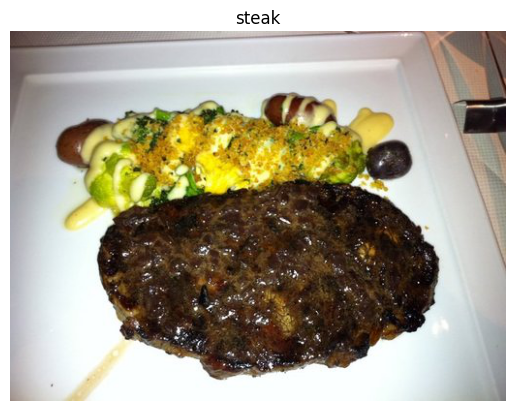

In [30]:
# lets view the random images
image = view_random_image("pizza_steak/train/","steak") 

In [31]:
# this image contains the large array 
image

array([[[ 82,  62,  61],
        [ 76,  56,  55],
        [ 74,  54,  53],
        ...,
        [ 95,  70,  63],
        [ 94,  69,  64],
        [ 97,  72,  67]],

       [[ 79,  59,  58],
        [ 78,  58,  57],
        [ 78,  58,  57],
        ...,
        [100,  73,  66],
        [ 99,  74,  69],
        [101,  76,  71]],

       [[ 75,  55,  54],
        [ 80,  60,  59],
        [ 82,  62,  61],
        ...,
        [104,  75,  67],
        [103,  76,  69],
        [102,  75,  68]],

       ...,

       [[158, 143, 138],
        [160, 145, 140],
        [163, 148, 143],
        ...,
        [127, 127, 127],
        [126, 126, 126],
        [125, 125, 125]],

       [[156, 141, 134],
        [158, 143, 136],
        [161, 146, 139],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [124, 124, 124]],

       [[154, 139, 132],
        [156, 141, 134],
        [159, 144, 137],
        ...,
        [125, 125, 125],
        [124, 124, 124],
        [123, 123, 123]]

In [32]:
# lets convert the image to the tensorflow constant

import tensorflow as tf

tf.constant(image)

<tf.Tensor: shape=(382, 512, 3), dtype=uint8, numpy=
array([[[ 82,  62,  61],
        [ 76,  56,  55],
        [ 74,  54,  53],
        ...,
        [ 95,  70,  63],
        [ 94,  69,  64],
        [ 97,  72,  67]],

       [[ 79,  59,  58],
        [ 78,  58,  57],
        [ 78,  58,  57],
        ...,
        [100,  73,  66],
        [ 99,  74,  69],
        [101,  76,  71]],

       [[ 75,  55,  54],
        [ 80,  60,  59],
        [ 82,  62,  61],
        ...,
        [104,  75,  67],
        [103,  76,  69],
        [102,  75,  68]],

       ...,

       [[158, 143, 138],
        [160, 145, 140],
        [163, 148, 143],
        ...,
        [127, 127, 127],
        [126, 126, 126],
        [125, 125, 125]],

       [[156, 141, 134],
        [158, 143, 136],
        [161, 146, 139],
        ...,
        [126, 126, 126],
        [125, 125, 125],
        [124, 124, 124]],

       [[154, 139, 132],
        [156, 141, 134],
        [159, 144, 137],
        ...,
        [125, 125, 12

In [33]:
# getting the values between 0 and 1 

image/255.

array([[[0.32156863, 0.24313725, 0.23921569],
        [0.29803922, 0.21960784, 0.21568627],
        [0.29019608, 0.21176471, 0.20784314],
        ...,
        [0.37254902, 0.2745098 , 0.24705882],
        [0.36862745, 0.27058824, 0.25098039],
        [0.38039216, 0.28235294, 0.2627451 ]],

       [[0.30980392, 0.23137255, 0.22745098],
        [0.30588235, 0.22745098, 0.22352941],
        [0.30588235, 0.22745098, 0.22352941],
        ...,
        [0.39215686, 0.28627451, 0.25882353],
        [0.38823529, 0.29019608, 0.27058824],
        [0.39607843, 0.29803922, 0.27843137]],

       [[0.29411765, 0.21568627, 0.21176471],
        [0.31372549, 0.23529412, 0.23137255],
        [0.32156863, 0.24313725, 0.23921569],
        ...,
        [0.40784314, 0.29411765, 0.2627451 ],
        [0.40392157, 0.29803922, 0.27058824],
        [0.4       , 0.29411765, 0.26666667]],

       ...,

       [[0.61960784, 0.56078431, 0.54117647],
        [0.62745098, 0.56862745, 0.54901961],
        [0.63921569, 0

## an end to end example

* Load our images
* preprocess our image
* Build CNN patterns 
* compile the model
* fit the model

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#random seed
tf.random.set_seed(42)
#preprocessing the data and generating 0 & 1's
train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)

#setup paths for the directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"


# # Import data from directories and turn it into batches
# train_data = train_gen.flow_from_directory(train_dir,
#                                                batch_size=32, # number of images to process at a time 
#                                                target_size=(224, 224), # convert all images to be 224 x 224
#                                                class_mode="binary", # type of problem we're working on
#                                                seed=42)

# valid_data = valid_gen.flow_from_directory(test_dir,
#                                                batch_size=32,
#                                                target_size=(224, 224),
#                                                class_mode="binary",
#                                                seed=42)
#Import data from the directories and turn into the batches

train_data = train_gen.flow_from_directory(train_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode="binary", seed=42)

valid_data = valid_gen.flow_from_directory(test_dir,
                                          batch_size=32,
                                          target_size=(224,224),
                                          class_mode="binary",
                                          seed=42)
# lets build the cnn model 

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=(3,3),
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding='valid'),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
   tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding='valid'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")                    
])

# compile our model

model_1.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))
     #flow_data_dir will create features and labels

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 220ms/step - loss: 0.5590 - accuracy: 0.7073 - val_loss: 0.4105 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4380 - accuracy: 0.7987 - val_loss: 0.3672 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.4028 - accuracy: 0.8207 - val_loss: 0.3547 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 12s 263ms/step - loss: 0.3937 - accuracy: 0.8240 - val_loss: 0.3417 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3672 - accuracy: 0.8420 - val_loss: 0.3524 - val_accuracy: 0.8440


In [ ]:
#  the train data is 47 because 1500/32 32 is batch size
# batchs are thing that divides the images is 32 set and runs second 32 set and soon
len(train_data)

In [ ]:
1500/32

## lets create the model used before 
we replicate the model that we have used before in the multiclass classification problem

In [49]:
#set random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 272ms/step - loss: 0.7885 - accuracy: 0.4953 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
